<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [50]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

# Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Standard scaler
from sklearn.preprocessing import StandardScaler

import warnings

In [39]:
df = pd.read_csv('df1.csv')

In [40]:
df.set_index(df['customer_id'], inplace=True)
df.drop(columns='customer_id', inplace=True)

In [41]:
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_amount_spent,age_group,customer_city,total_orders
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,2,0,0,0,0,0,28.88,0-20,2,2
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,19.21,0-20,8,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,9.20,31-40,4,2
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,31.56,NaN,4,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,55.44,0-20,4,2


In [42]:
# the feature 'customer_city' is a categorical feature
df['customer_city'] = df['customer_city'].astype('object')

In [43]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [44]:
non_metric = df.select_dtypes(include=['object'])
# identify the metric features without the orders_per_dow, amount_spent_per_cuisine and orders_per_hour
metric_features = df.columns.drop(non_metric.columns).drop(orders_per_dow).drop(amount_spent_per_cuisine).drop(orders_per_hour).to_list()

print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'total_amount_spent', 'total_orders']


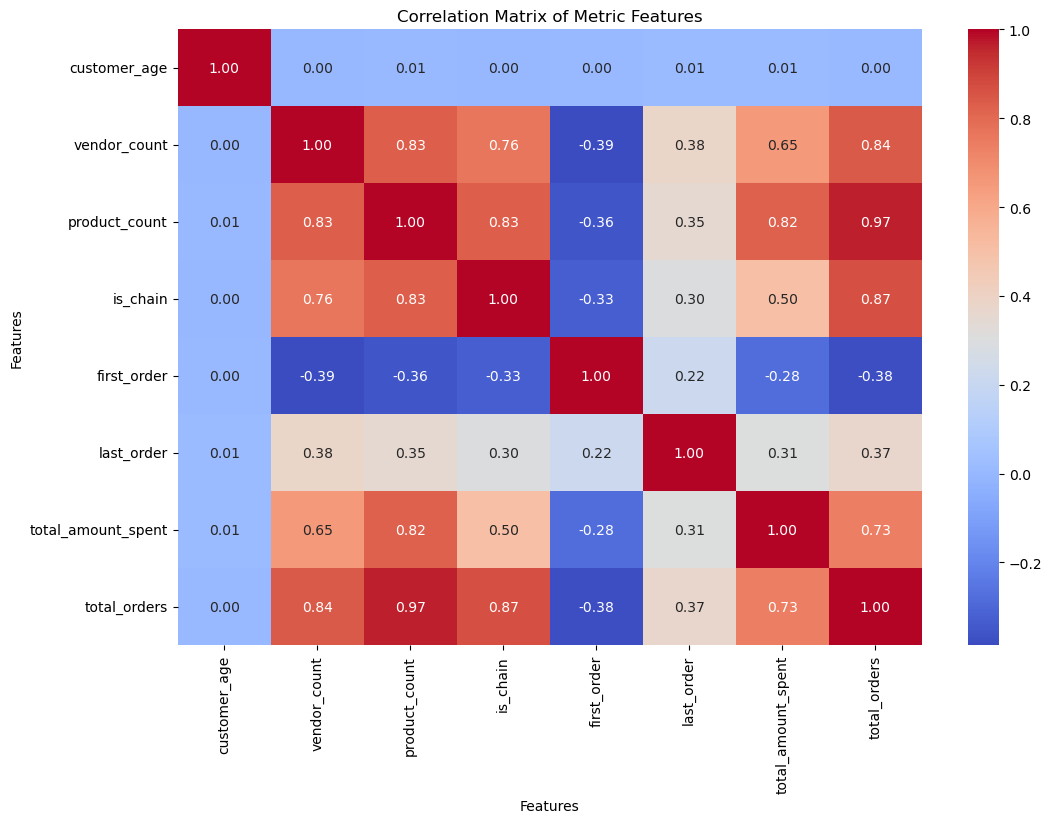

In [45]:
correlation_matrix = df[metric_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix of Metric Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

**Keep**: customer_age, first_order, last_order, customer_city, total_amount_spent, total_orders

**Suggestions**: take information of the CUI_(...) features, such as diversity and tastes; HR_(...) can indicate the customer usage of the delivery service (is it for meals, groceries) - more feature engineering?

## Encoding Categorical features

In [49]:
# Encode categorical data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-100)
encoder.fit(non_metric)
non_metric_encoded = encoder.transform(non_metric)

# Convert encoded data into a DataFrame
df_categorical_encoded = pd.DataFrame(non_metric_encoded, columns=non_metric.columns, index=non_metric.index)

# Combine encoded non-metric and metric data
df = pd.concat([df_categorical_encoded, df[metric_features]], axis=1)

df.head()

,customer_region,last_promo,payment_method,age_group,customer_city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,total_amount_spent,total_orders
customer_id,,,,,,,,,,,,,
1b8f824d5e,1.0,1.0,2.0,0.0,0.0,18.0,2,5,1,0.0,1,28.88,2
5d272b9dcb,8.0,2.0,2.0,0.0,2.0,17.0,2,2,2,0.0,1,19.21,2
f6d1b2ba63,5.0,2.0,1.0,2.0,1.0,38.0,1,2,2,0.0,1,9.20,2
180c632ed8,5.0,1.0,2.0,NaN,1.0,NaN,2,3,1,0.0,2,31.56,2
4eb37a6705,5.0,0.0,2.0,0.0,1.0,20.0,2,5,0,0.0,2,55.44,2


## Scaling the Data

In [51]:
# Scale the train set
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

df.head()

,customer_region,last_promo,payment_method,age_group,customer_city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,total_amount_spent,total_orders
customer_id,,,,,,,,,,,,,
1b8f824d5e,-1.270769,0.101617,1.816397,-1.606799,-1.216791,-1.327239,-0.397770,-0.096049,-0.457397,-1.180963,-2.697513,-0.202913,-0.465876
5d272b9dcb,1.225525,1.014476,1.816397,-1.606799,1.220083,-1.466825,-0.397770,-0.527244,-0.206007,-1.180963,-2.697513,-0.411293,-0.465876
f6d1b2ba63,0.155685,1.014476,0.555689,1.026341,0.001646,1.464487,-0.758512,-0.527244,-0.206007,-1.180963,-2.697513,-0.626999,-0.465876
180c632ed8,0.155685,0.101617,1.816397,NaN,0.001646,NaN,-0.397770,-0.383512,-0.457397,-1.180963,-2.654467,-0.145161,-0.465876
4eb37a6705,0.155685,-0.811242,1.816397,-1.606799,0.001646,-1.048067,-0.397770,-0.096049,-0.708788,-1.180963,-2.654467,0.369432,-0.465876
